In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.optimize as opt

#Requerimiento
Q_gpm = 500 #[gpm]
Q = 500*231/(60*12**3) #[ft3/s]
print("Q [ft3/s]",Q)
H = 50 #[ft]

#Motor síncrono

Polos = 4
fhz = 60 #[hz]
n = (120*fhz/Polos)*np.pi/30 #[Rad/s]
print("n [rad/s]",n)
RPM = (120*fhz/Polos) #[RPM]

#Calcula Ns

Ns = n*Q**(1/2)/((32.2*H)**(3/4))
print("Ns",Ns)
#Cordier
if Ns > 0.85:
    Ds = (8.26/Ns)**0.517
else:
    Ds = (2.5/Ns)**1.092
print("Ds",Ds)    


#Diámetro en in

D = Ds*12*Q**0.5/((32.2*H)**(0.25))
print("Diámetro del rotor en in",D)

#Estimar el ojo mediante Wright

d = 12*D*1.53*(Q/(n*D**3))**(1/3)
print("d ojo [in]",d)

#Asumiendo b1 igual a d/4

b1 = d/4 #[in]
print("b1 [in]",b1)

#Se plantea el triángulo de velocidades a la entrada
U1 = d*n/(2*12) #[ft/s]
print("U1 [ft/s]",U1)
V1 = Q/(np.pi*d*b1/12**2) #[ft/s]
print("V1 [ft/s]",V1)
W1 = np.sqrt(U1**2+V1**2) #[ft/s]
print("W1 [ft/s]",W1)
beta1 = np.arctan(V1/U1)*180/np.pi #[grados]
print("Beta 1 [º]",beta1)
alfa1 = 90 #[grados]

#Triángulo de velocidades a la salida
U2 = D*n/(12*2) #[ft/s]
print("U2 [ft/s]",U2)
V2_r = V1 #[ft/s]
#Se determina b2 a partir del Q, que es el mismo de la entrada
b2 = 12*Q/(np.pi*(D/12)*V2_r)
print("b2 [in]",b2)

#Se estima la eficiencia para usar la ecuación de euler

Nsd = RPM*np.sqrt(Q_gpm)/(H**0.75)
print("Nsd",Nsd)


Q [ft3/s] 1.1140046296296295
n [rad/s] 188.49555921538757
Ns 0.7827538527380004
Ds 3.553953620272227
Diámetro del rotor en in 7.106078990827213
d ojo [in] 3.3194640359928846
b1 [in] 0.8298660089982212
U1 [ft/s] 26.071009573326922
V1 [ft/s] 18.536326517580846
W1 [ft/s] 31.98895029442002
Beta 1 [º] 35.41259148838003
U2 [ft/s] 55.81101388352886
b2 [in] 0.3876554672581635
Nsd 2140.572807004898


Se usa el diagrama de eficiencia vs Nsd para estimar eta
![alt text](image.png)

In [2]:
eta = 0.75 #[Eficiencia de la bomba a partir del diagrama (Nsd y gpm)]

#Número adimensional de cabeza psi

Psi = 2*32.2*H/(eta*U2**2)
print("Psi",Psi)


Psi 1.3783349990666638


A partir del número adimensional de cabeza se determina B (lado de la garganta suponiendola cuadrada)
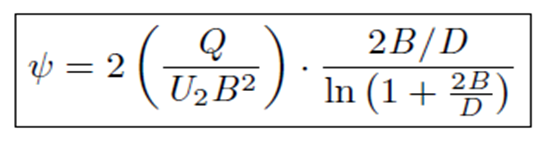

In [3]:
from scipy.optimize import fsolve

f = lambda x: Psi - 2*(Q/(U2*(x/12)**2))*(2*x/D)/np.log(1+2*x/D)
B = fsolve(f, 2) #Lado de la garganta suponiendo que es cuadrada
print("B",B)
A_gar = B**2 #[in^2]
print("Área garganta",A_gar)


B [2.32875511]
Área garganta [5.42310036]


Se determina el factor Y
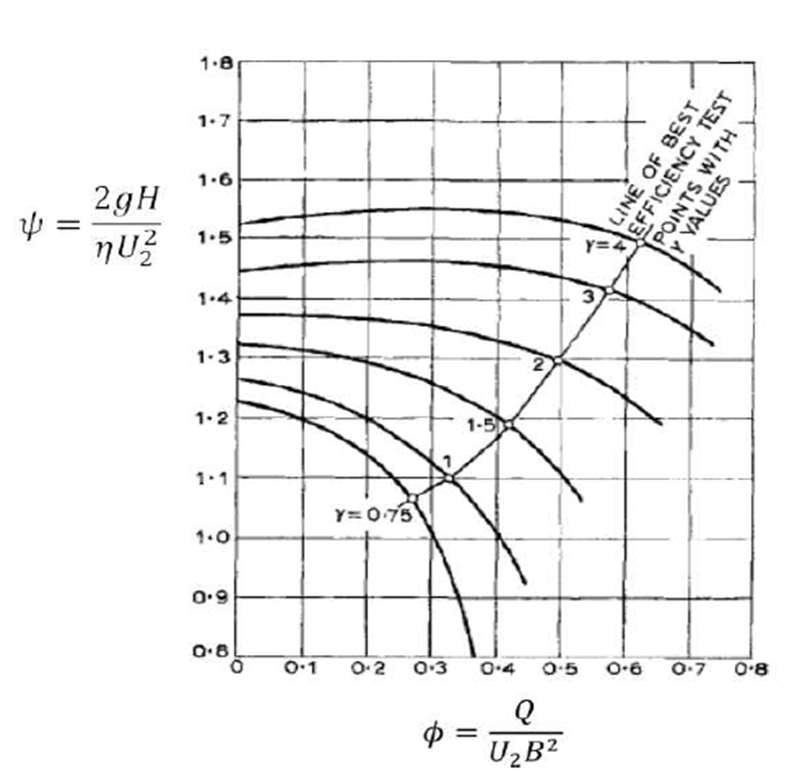

V2 tangencial con desilazamiento 38.46313688453165
V2 con deslizamiento 42.69670127497662
beta 2 geometrica en grados [60.31996505]
beta 2 real del flujo 46.896886508731875
V2 tangencial sin deslizamiento [ft/s] [45.24663873]
Alfa 2 en grados 25.730554501708475
Diferencia entre velocidades tangenciales con y sin deslizamiento [6.78350184]
W2 [ft/s] [21.33544992]
K [0.87845586]


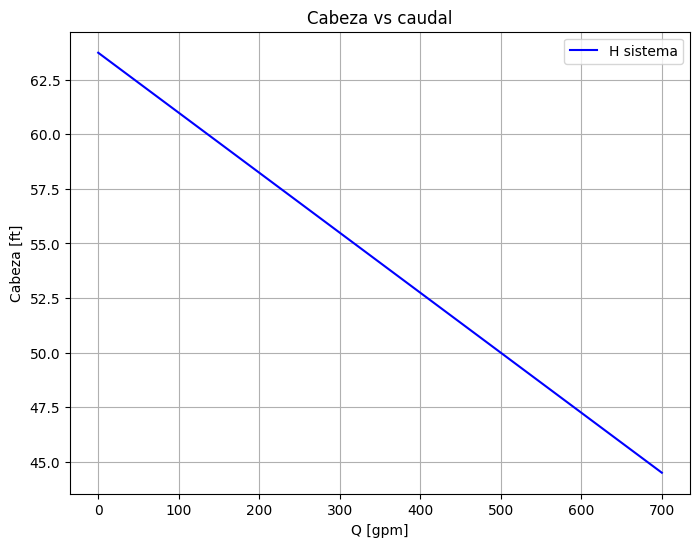

In [4]:
Y = 2.8



V2_th_K = 32.2*H/(U2*eta)
print("V2 tangencial con desilazamiento",V2_th_K)
V2 = np.sqrt(V2_r**2+V2_th_K**2)
print("V2 con deslizamiento",V2)


beta2 = np.atan(Y*A_gar/(np.pi*b2*D))*180/np.pi
print("beta 2 geometrica en grados",beta2)

beta2_k = np.atan(V2_r/(U2-V2_th_K))*180/np.pi
print("beta 2 real del flujo",beta2_k)

V2_th = U2 - V2_r/np.tan(beta2*np.pi/180)
print("V2 tangencial sin deslizamiento [ft/s]",V2_th)

alfa2 = np.atan(V2_r/V2_th_K)*180/np.pi
print("Alfa 2 en grados",alfa2)

dV_th = V2_th-V2_th_K
print("Diferencia entre velocidades tangenciales con y sin deslizamiento",dV_th)

W2 = V2_r/np.sin(beta2*np.pi/180)
print("W2 [ft/s]",W2)

K = 1 - dV_th/U2
print("K",K)

Q_graf_gpm = np.linspace(0,700,29)
Q_graf_ft3 = Q_graf_gpm*231/(60*12**3)
H_graf = (eta*U2**2)/(2*32.2)*(2*K - 2*Q_graf_ft3/(np.pi*D*b2*U2*np.tan(beta2*np.pi/180)/144))

plt.figure(figsize=(8,6))
plt.plot(Q_graf_gpm, H_graf, 'b-', label="H sistema")


plt.xlabel("Q [gpm]")
plt.ylabel("Cabeza [ft]")
plt.title("Cabeza vs caudal")
plt.legend()
plt.grid(True)
plt.show()